In [18]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
airline_data = pd.read_csv('airlines.csv')
airport_data = pd.read_csv('airports.csv')
flight_clean = pd.read_csv('Clean-Data.csv',dtype=str)

In [10]:
flight_clean.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEP_HOUR,SCHEDULED_DEP_MIN,DEP_HOUR,DEP_MIN,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF_HOUR,WHEELS_OFF_MIN,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON_HOUR,WHEELS_ON_MIN,TAXI_IN,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MIN,ARRIVAL_TIME_HOUR,ARRIVAL_TIME_MIN,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLIGHT_STATUS
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00,05,23,54,-11,21,00,15,205,194,169,1448,04,04,4,04,30,04,08,-22,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,00,10,00,02,-8,12,00,14,280,279,263,2330,07,37,4,07,50,07,41,-9,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival
2,2015,1,1,4,US,840,N171US,SFO,CLT,00,20,00,18,-2,16,00,34,286,293,266,2296,08,00,11,08,06,08,11,5,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,On Time
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,00,20,00,15,-5,15,00,30,285,281,258,2342,07,48,8,08,05,07,56,-9,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,00,25,00,24,-1,11,00,35,235,215,199,1448,02,54,5,03,20,02,59,-21,0,0,N/A - Flight Not Cancelled,0,0,0,0,0,Early Arrival


### Data Preprocessing

In [11]:
df = flight_clean.copy()

In [12]:
int_cols = [
    'YEAR','MONTH','DAY','DAY_OF_WEEK','FLIGHT_NUMBER',
    'DEPARTURE_DELAY','TAXI_OUT','SCHEDULED_TIME',
    'ELAPSED_TIME','AIR_TIME','DISTANCE','TAXI_IN',
    'ARRIVAL_DELAY','DIVERTED','CANCELLED',
    'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'
]

df[int_cols] = df[int_cols].astype('int64')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   YEAR                    499999 non-null  int64 
 1   MONTH                   499999 non-null  int64 
 2   DAY                     499999 non-null  int64 
 3   DAY_OF_WEEK             499999 non-null  int64 
 4   AIRLINE                 499999 non-null  object
 5   FLIGHT_NUMBER           499999 non-null  int64 
 6   TAIL_NUMBER             499999 non-null  object
 7   ORIGIN_AIRPORT          499999 non-null  object
 8   DESTINATION_AIRPORT     499999 non-null  object
 9   SCHEDULED_DEP_HOUR      499999 non-null  object
 10  SCHEDULED_DEP_MIN       499999 non-null  object
 11  DEP_HOUR                499999 non-null  object
 12  DEP_MIN                 499999 non-null  object
 13  DEPARTURE_DELAY         499999 non-null  int64 
 14  TAXI_OUT                499999 non-n

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,499999.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,499999.0,1.060062,0.237602,1.0,1.0,1.0,1.0,2.0
DAY,499999.0,14.995452,9.320100,1.0,7.0,15.0,23.0,31.0
DAY_OF_WEEK,499999.0,4.006000,2.012337,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,499999.0,2263.470967,1803.531680,1.0,759.0,1732.0,3484.0,9793.0
DEPARTURE_DELAY,499999.0,9.790344,37.139699,-48.0,-5.0,-1.0,8.0,1988.0
TAXI_OUT,499999.0,15.937028,9.959970,0.0,10.0,14.0,19.0,177.0
SCHEDULED_TIME,499999.0,140.254691,74.854035,23.0,85.0,122.0,173.0,718.0
ELAPSED_TIME,499999.0,131.676237,76.752729,0.0,79.0,116.0,167.0,724.0
AIR_TIME,499999.0,108.540245,73.491398,0.0,56.0,91.0,142.0,676.0


### Null Value Check

In [17]:
# df.isnull().sum()

### Data Analysis

### what's the distribution of flight status? 

C:\Users\Sharan Kalyan\Anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Early Arrival      215719
Delayed Arrival    150954
On Time            133326
Name: FLIGHT_STATUS, dtype: int64


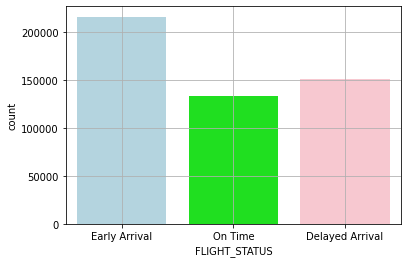

In [28]:

palette = ['lightblue','lime','pink']
sns.countplot(df['FLIGHT_STATUS'],palette=palette)
plt.grid()
print(df['FLIGHT_STATUS'].value_counts())
plt.show()